# ***TITANIC DATASET - LOGISTIC REGRESSION***
### **OUR MAIN GOALS -**
1. Analyse, Visualize and Preprocess the data.
2. Implement Pipelines in this project
3. Use Grid Search and read its theory
4. Learn about the confusion matrix and other classification metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Importing the data
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
## Let's get the info of this data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Only Age and Cabin columns have null values. 
- The large portion of the Cabin feature is missing and the feature itself can't be ignored completely because some the cabins might have higher survival rates
- Age is important. We will likely replace it with some mean, median mode...

## **DATA ANALYSIS AND VISUALIZATION**

In [4]:
## Checking the number of unique values in each
for index, col_name in enumerate(data.columns):
    print(f"{index + 1}. {col_name} : {len(data[col_name].value_counts())}")

1. PassengerId : 891
2. Survived : 2
3. Pclass : 3
4. Name : 891
5. Sex : 2
6. Age : 88
7. SibSp : 7
8. Parch : 7
9. Ticket : 681
10. Fare : 248
11. Cabin : 147
12. Embarked : 3


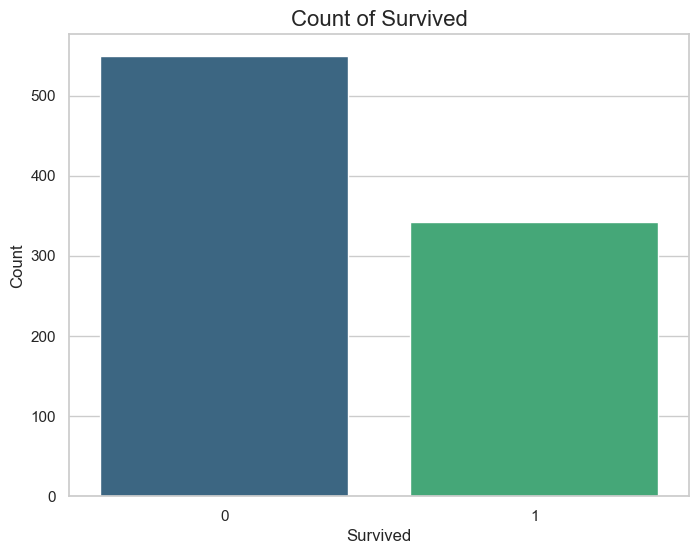

In [7]:
## Let's check the counts of target - survived
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data, palette='viridis')
plt.title('Count of Survived'.format(col), fontsize=16)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

0 - Not survived
1 - Survived

In [9]:
## Let's see Sex and its relation to Survived
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

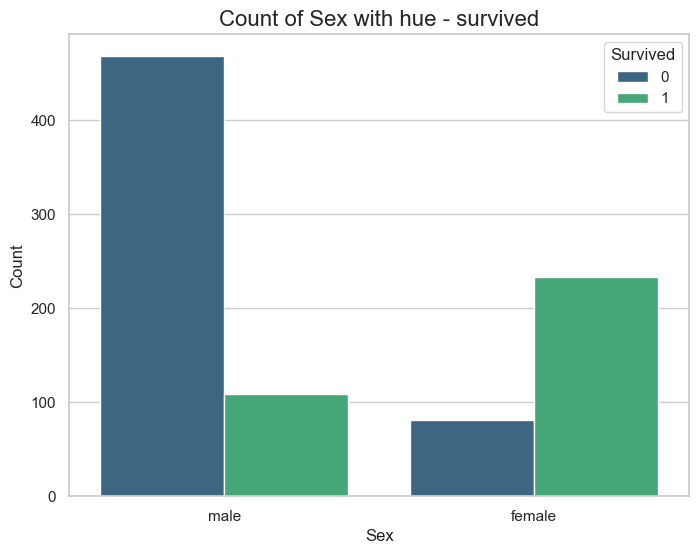

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data, hue='Survived',palette='viridis')
plt.title('Count of Sex with hue - survived'.format(col), fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

1. It's interesting to see more males died here than females.
2. Men dying > Men survivng and vice versa for females

**This aligns with the historical "women and children first" policy during the evacuation.**

In [12]:
# Let's see how the passenger class affected the survival rate.
# Was it that the higher classes were given more priority..
# And what is relation of pclass with fare
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Most members were from 3rd class...which is the cheaper one

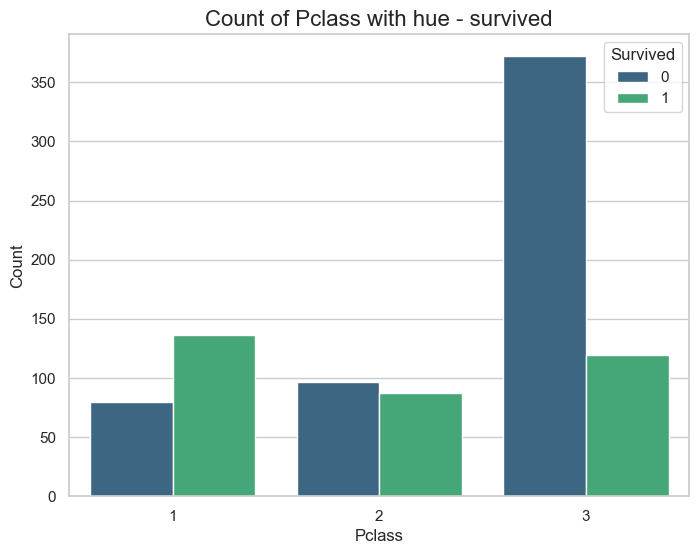

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data, hue='Survived',palette='viridis')
plt.title('Count of Pclass with hue - survived'.format(col), fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

1. Yes it is clear, that most people from top classes had the resources and got the priority to survive
2. The number of peope are most from the 3rd class....suggests chances of dying if you were from third class were - 370/491

<Axes: ylabel='Frequency'>

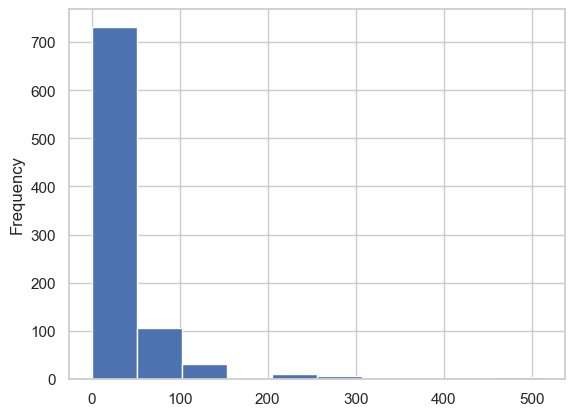

In [15]:
## Let's check out the Fare paid and it being related to the Pclass
data['Fare'].plot(kind='hist')

In [17]:
print(np.mean(data['Fare']))
print(np.median(data['Fare']))

32.204207968574636
14.4542


Mean >>> Median means left skewewd data

<Axes: xlabel='Pclass', ylabel='Fare'>

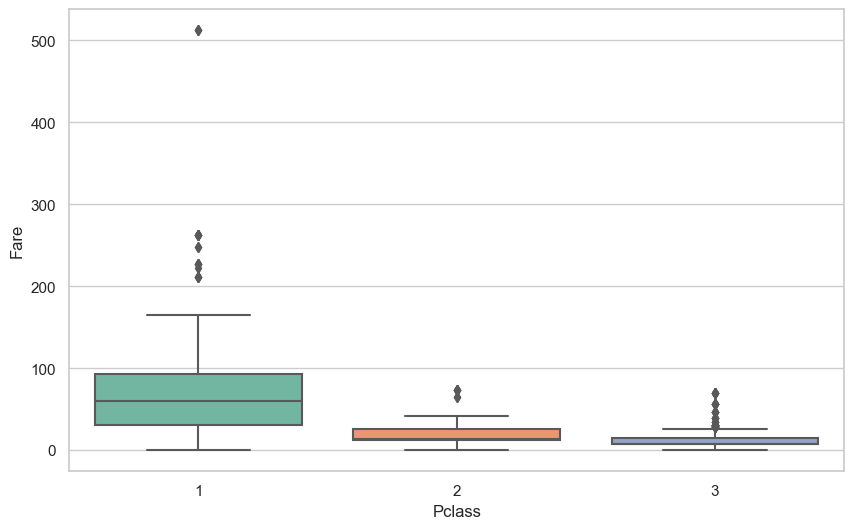

In [20]:
# Pclass vs fare
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Pclass', y='Fare', palette="Set2")

In [26]:
# There is some outlier. Someone from first class paid around....more than 500
data[data['Pclass'] == 1].max()

C:\Users\PROGRAMMER\AppData\Local\Temp\ipykernel_11232\2035835528.py:2: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[data['Pclass'] == 1].max()


PassengerId                         890
Survived                              1
Pclass                                1
Name           Young, Miss. Marie Grice
Sex                                male
Age                                80.0
SibSp                                 3
Parch                                 4
Ticket                        WE/P 5735
Fare                           512.3292
dtype: object

In [27]:
## Let's see the sibling/spouse column - represents the number of siblings and spouses the passenger had aboard the ship
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

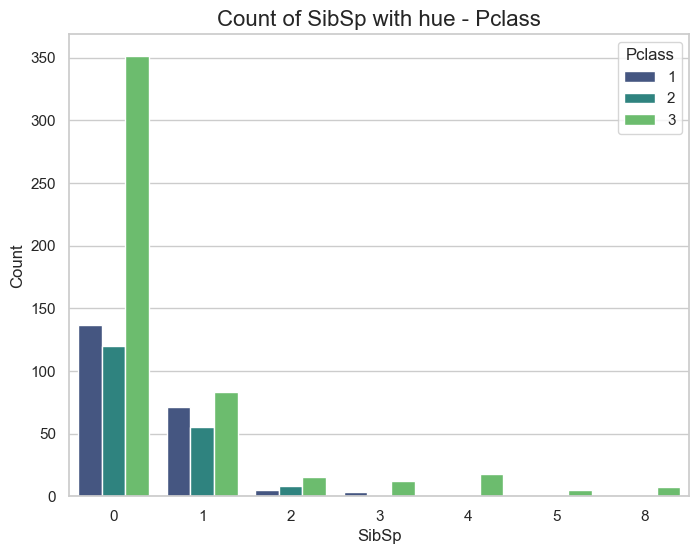

In [28]:
# It can be thought off as that more siblinc spouse means higher the class or lower the class for budget. lets see
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', data=data, hue='Pclass',palette='viridis')
plt.title('Count of SibSp with hue - Pclass'.format(col), fontsize=16)
plt.xlabel('SibSp', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Thats not a case. We see that there are too less passengers with siblings to generalize

In [30]:
# Now let's see the parch - parents children a passenger has on board
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [31]:
## We can do a little feature engineering here.
## We can add a column family size, with sibsp + parch + 1 (1 for the individual himself)
## let's do this and see
data['family_count'] = data['SibSp'] + data['Parch'] + 1
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [33]:
## Let's check correlation of family to survival
print(data[['family_count', 'Survived']].corr())
# This is very close to 0, indicating almost no linear correlation.b

              family_count  Survived
family_count      1.000000  0.016639
Survived          0.016639  1.000000


In [35]:
family_survival = data.groupby('family_count')['Survived'].mean()
print(family_survival)
'''
Traveling alone (family_count = 1): only ~30% survived.
Small families (2–4): much higher survival rates, peaking at 72%.
Large families (5+): survival drops sharply — to 0–20%
'''

family_count
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


In [36]:
# We can further update it to
def family_group(n):
    if n == 1:
        return 'alone'
    elif 2 <= n <= 4:
        return 'small'
    else:
        return 'large'

data['family_group'] = data['family_count'].apply(family_group)
data.head(3)
# Ahead it will be encoded

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_count,family_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,alone


### THE CABIN COLUMN

Cabin feature is little bit tricky and it needs further exploration. The large portion of the Cabin feature is missing and the feature itself can't be ignored completely because some the cabins might have higher survival rates. It turns out to be the first letter of the Cabin values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.

In [39]:
'''
Cabins are rooms. eg - C145 = cabin C
A = highest decks (more luxurious)
B, C, D, E, F, G = lower and more interior decks
'''
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [43]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
data['Deck'] = data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

In [44]:
data['Deck'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

We have A B C D E F G T  and M (For missing)

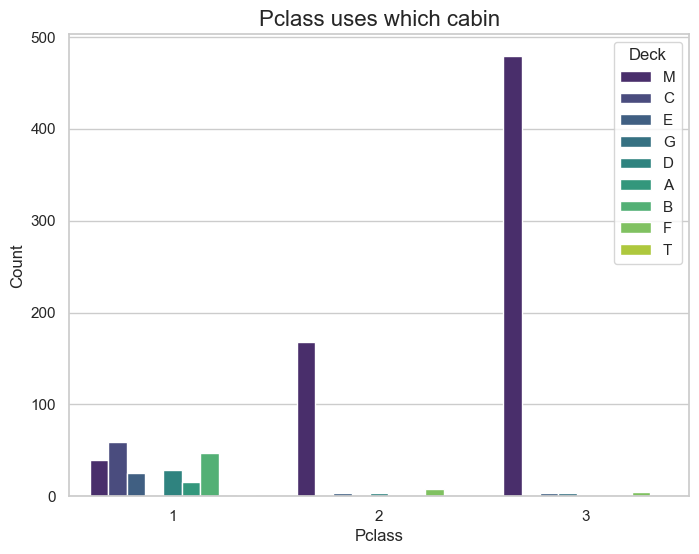

In [45]:
## Let's see which pclass stayed in which cabin
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data, hue='Deck',palette='viridis')
plt.title('Pclass uses which cabin'.format(col), fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

1. 100% of A, B and C decks are 1st class passengers
2. Deck D has 87% 1st class and 13% 2nd class passengers
3. Deck E has 83% 1st class, 10% 2nd class and 7% 3rd class passengers
4. Deck F has 62% 2nd class and 38% 3rd class passengers
5. 100% of G deck are 3rd class passengers
6. There is one person on the boat deck in T cabin and he is a 1st class passenger. T cabin passenger has the closest resemblance to A deck passengers so he is grouped with A deck
7. Passengers labeled as M are the missing values in Cabin feature. I don't think it is possible to find those passengers' real Deck so I decided to use M like a deck

In [48]:
# Passenger in the T deck is changed to A
idx = data[data['Deck'] == 'T'].index
data.loc[idx, 'Deck'] = 'A'

In [51]:
data['Deck'] = data['Deck'].replace(['A', 'B', 'C'], 'ABC')
data['Deck'] = data['Deck'].replace(['D', 'E'], 'DE')
data['Deck'] = data['Deck'].replace(['F', 'G'], 'FG')

data['Deck'].value_counts()
# Will be encoded afterwards

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64

## NOTE - 
Here we can do quantile binning the age and fare features. As they are skewed but first we will to model without it

In [52]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_count,family_group,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,small,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,small,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,alone,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,small,ABC
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,alone,M


## **USING PIPELINE**
A pipeline in machine learning is a sequence of steps that automates the process of preparing data, training a model, and making predictions. It helps in organizing code and ensures that all steps are applied consistently.

*What we want to do -*
1. Ordinally encode the Deck and Embarked and family_group
2. Fill the missing values of Age by mean/median
3. Drop Name, Ticket and Cabin

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_count,family_group,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,small,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,small,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,alone,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,small,ABC
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,alone,M


In [57]:
# dropping the columns to drop
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_count,family_group,Deck
0,1,0,3,male,22.0,1,0,7.25,S,2,small,M


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Sex           891 non-null    object 
 4   Age           714 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Fare          891 non-null    float64
 8   Embarked      889 non-null    object 
 9   family_count  891 non-null    int64  
 10  family_group  891 non-null    object 
 11  Deck          891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [61]:
## Now pipeline building

numeric_features = ['Age']
categorical_features = ['Sex', 'Embarked', 'family_count', 'Deck']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder()) 
])

# Combine everything into a preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

# model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [62]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set sizes:")
print(f"X_train: {X_train.shape}") 
print(f"y_train: {y_train.shape}") 
print("\nTest set sizes:")
print(f"X_test: {X_test.shape}")   
print(f"y_test: {y_test.shape}") 

Training set sizes:
X_train: (712, 11)
y_train: (712,)

Test set sizes:
X_test: (179, 11)
y_test: (179,)


In [63]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Sex', 'Embarked',
                                                   'family_count', 'Deck'])])),
                ('classifier', LogisticRegression())])

In [65]:
y_preds = model_pipeline.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

## **CLASSIFICATION METRICS**
1. Accuracy - Accuracy is defined as the number of correct predictions over the total predictions
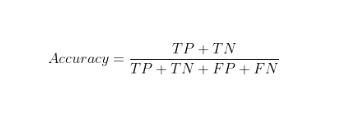
2. Precision -  The proportion of true positive predictions out of all positive predictions made (i.e., how many selected items are relevant).
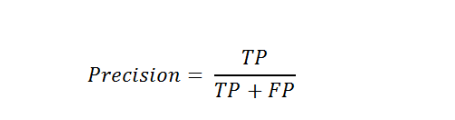
3. Recall - The proportion of true positive predictions out of all actual positives (i.e., how many relevant items are selected).
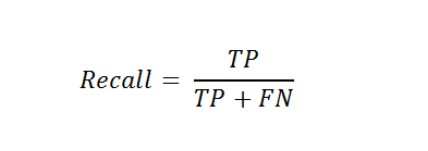



In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
Recall: 0.7297297297297297


1. Insight: High precision means the model is good at not labeling negative cases as positive. This is important when false positives are costly (e.g., a spam filter misclassifying a legitimate email as spam).
2. Insight: High recall means the model is good at catching as many positives as possible, which is important when missing a positive case is costly (e.g., detecting diseases in medical tests where missing a patient’s positive result can be dangerous).